In [156]:
# Try Best xgb + extra tree algos
from extract_helpers_shifted import *
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, \
    GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from scoring_functions import *


pooled_set = \
    [
        "$\mathcal{Bond}_{7}$", "$\mathcal{Bond}_{8}$", "$\mathcal{Bond}_{9}$",
        "$\mathcal{DelocIndBond}_{5}$",
        "$\mathcal{DelSqRho}_{1}$",
        "$\mathcal{DelSqV}_{7}$",
        "$\mathcal{ESP}_{1}$", "$\mathcal{ESP}_{2}$", "$\mathcal{ESP}_{4}$", "$\mathcal{ESP}_{5}$",
        "$\mathcal{ESP}_{6}$",
        "$\mathcal{ESPe}_{10}$",
        "$\mathcal{ESPn}_{4}$", "$\mathcal{ESPn}_{5}$",
        "$\mathcal{HessRhoEigVals}_{c,7}$",
        "$\mathcal{K|Scaled|}_{basic,1}$", "$\mathcal{K|Scaled|}_{basic,2}$",
        "$\mathcal{K|Scaled|}_{basic,3}$", "$\mathcal{K|Scaled|}_{basic,4}$",
        "$\mathcal{K|Scaled|}_{basic,6}$",
        "$\mathcal{Kinetic}_{basic,5}$",
        "$\mathcal{Lagr}_{basic,1}$", "$\mathcal{Lagr}_{basic,5}$", "$\mathcal{Lagrangian}_{2}$",
        "$\mathcal{Stress_EigVals}_{c,7}$",
        "$\mathcal{Vnuc}_{1}$", "$\mathcal{Vnuc}_{2}$", "$\mathcal{Vnuc}_{3}$",
        "$\mathcal{Vnuc}_{4}$", "$\mathcal{Vnuc}_{5}$", "$\mathcal{Vnuc}_{6}$"
    ]

pool_uncorr = \
    [
        "$\mathcal{Bond}_{7}$", "$\mathcal{Bond}_{8}$", "$\mathcal{Bond}_{9}$",
        "$\mathcal{DelocIndBond}_{5}$",
        "$\mathcal{DelSqRho}_{1}$",
        "$\mathcal{ESP}_{1}$", "$\mathcal{ESP}_{2}$", "$\mathcal{ESP}_{4}$", "$\mathcal{ESP}_{6}$",
        "$\mathcal{ESPn}_{5}$",
        "$\mathcal{HessRhoEigVals}_{c,7}$",
        "$\mathcal{K|Scaled|}_{basic,1}$", "$\mathcal{K|Scaled|}_{basic,2}$",
        "$\mathcal{K|Scaled|}_{basic,3}$", "$\mathcal{K|Scaled|}_{basic,4}$",
        "$\mathcal{Kinetic}_{basic,5}$", "$\mathcal{Kinetic}_{basic,6}$",
        "$\mathcal{Lagr}_{basic,1}$", "$\mathcal{Lagr}_{basic,5}$", "$\mathcal{Lagrangian}_{2}$",
        "$\mathcal{Vnuc}_{1}$", "$\mathcal{Vnuc}_{2}$", "$\mathcal{Vnuc}_{3}$",
        "$\mathcal{Vnuc}_{4}$", "$\mathcal{Vnuc}_{5}$", "$\mathcal{Vnuc}_{6}$"
    ]

# physical set, general model
physical = \
    [
        "$\mathcal{Bond}_{7}$", "$\mathcal{Bond}_{8}$", "$\mathcal{Bond}_{9}$", "$\mathcal{Bond}_{10}$",
        "$\mathcal{DelocIndBond}_{5}$",
        "$\mathcal{ESP}_{1}$", "$\mathcal{ESP}_{2}$", "$\mathcal{ESP}_{3}$", "$\mathcal{ESP}_{4}$",
        "$\mathcal{ESP}_{5}$", "$\mathcal{ESP}_{6}$",
        "$\mathcal{ESPn}_{4}$", "$\mathcal{ESPn}_{5}$",
        "$\mathcal{HessRhoEigVals}_{c,7}$",
        "$\mathcal{K|Scaled|}_{basic,1}$", "$\mathcal{K|Scaled|}_{basic,2}$", "$\mathcal{K|Scaled|}_{basic,3}$",
        "$\mathcal{K|Scaled|}_{basic,4}$", "$\mathcal{K|Scaled|}_{basic,5}$", "$\mathcal{K|Scaled|}_{basic,6}$",
        "$\mathcal{Vnuc}_{1}$", "$\mathcal{Vnuc}_{2}$", "$\mathcal{Vnuc}_{3}$", "$\mathcal{Vnuc}_{4}$",
        "$\mathcal{Vnuc}_{5}$",
        "$\mathcal{Vnuc}_{6}$"
    ]

pooled_post = [
    "$\mathcal{Bond}_{7}$", "$\mathcal{Bond}_{8}$", "$\mathcal{Bond}_{9}$",
    "$\mathcal{q}_{1}$", "$\mathcal{q}_{2}$", "$\mathcal{q}_{4}$", "$\mathcal{q}_{5}$",
    "$\mathcal{D2'}_{7}$", "$\mathcal{D2}_{7}$", "$\mathcal{D2}_{sum,7}$",
    "$\mathcal{DelocIndBond}_{1}$", "$\mathcal{DelocIndBond}_{2}$", "$\mathcal{DelocIndBond}_{4}$",
    "$\mathcal{DelocIndBond}_{5}$",
    "$\mathcal{DI}_{1}$", "$\mathcal{DI}_{3}$", "$\mathcal{DI}_{5}$", "$\mathcal{DI}_{6}$",
    "$\mathcal{Ee}_{1}$", "$\mathcal{Ee}_{3}$", "$\mathcal{Ee}_{4}$",
    "$\mathcal{ESP}_{1}$", "$\mathcal{ESP}_{10}$", "$\mathcal{ESP}_{2}$", "$\mathcal{ESP}_{3}$",
    "$\mathcal{ESP}_{4}$",
    "$\mathcal{ESP}_{5}$", "$\mathcal{ESP}_{6}$",
    "$\mathcal{ESPe}_{10}$", "$\mathcal{ESPn}_{5}$",
    "$\mathcal{LI}_{1}$", "$\mathcal{LI}_{3}$", "$\mathcal{LI}_{5}$", "$\mathcal{LI}_{6}$",
    "$\mathcal{T}_{1}$", "$\mathcal{T}_{3}$", "$\mathcal{T}_{4}$"
]
pool_uncorr_post = [
    "$\mathcal{Bond}_{7}$", "$\mathcal{Bond}_{8}$", "$\mathcal{Bond}_{9}$",
    "$\mathcal{q}_{1}$", "$\mathcal{q}_{2}$", "$\mathcal{q}_{4}$", "$\mathcal{q}_{5}$",
    "$\mathcal{D2}_{sum,7}$",
    "$\mathcal{DI}_{1}$", "$\mathcal{DI}_{3}$", "$\mathcal{DI}_{5}$", "$\mathcal{DI}_{6}$",
    "$\mathcal{Ee}_{1}$", "$\mathcal{Ee}_{3}$", "$\mathcal{Ee}_{4}$",
    "$\mathcal{ESP}_{1}$", "$\mathcal{ESP}_{10}$", "$\mathcal{ESP}_{2}$", "$\mathcal{ESP}_{3}$",
    "$\mathcal{ESP}_{4}$",
    "$\mathcal{ESP}_{5}$", "$\mathcal{ESP}_{6}$",
    "$\mathcal{ESPe}_{10}$", "$\mathcal{ESPn}_{5}$"
]
phys_post = [
    "$\mathcal{Bond}_{7}$", "$\mathcal{Bond}_{8}$", "$\mathcal{Bond}_{9}$", "$\mathcal{Bond}_{10}$",
    "$\mathcal{q}_{1}$", "$\mathcal{q}_{2}$", "$\mathcal{q}_{3}$",
    "$\mathcal{q}_{4}$", "$\mathcal{q}_{5}$", "$\mathcal{q}_{6}$",
    "$\mathcal{D2}_{sum,7}$",
    "$\mathcal{DI}_{1}$", "$\mathcal{DI}_{2}$", "$\mathcal{DI}_{3}$",
    "$\mathcal{DI}_{4}$", "$\mathcal{DI}_{5}$", "$\mathcal{DI}_{6}$",
    "$\mathcal{Ee}_{1}$", "$\mathcal{Ee}_{2}$", "$\mathcal{Ee}_{3}$", "$\mathcal{Ee}_{4}$",
    "$\mathcal{ESP}_{1}$", "$\mathcal{ESP}_{2}$", "$\mathcal{ESP}_{3}$",
    "$\mathcal{ESP}_{4}$", "$\mathcal{ESP}_{5}$", "$\mathcal{ESP}_{6}$", "$\mathcal{ESP}_{10}$"

]



x, y = extract_all()
x_val = extract_test()



min = np.min(y)
max = np.max(y)
# y_scale = (y - min) / (max - min)
std = (np.std(y), np.mean(y))
# std = max - min
y_scale = (y - np.mean(y)) / np.std(y)


phys_x_df = x[physical]
pool_x_uncorr_df = x[pool_uncorr]
pool_x_df = x[pooled_set]

pool_post_x_df = x[pooled_post]
uncorr_post_x_df = x[pool_uncorr_post]
phys_x_post_df = x[phys_post]

full_input = scale(x)
pool_x = scale(x[pooled_set].to_numpy())
phys_x = scale(x[physical].to_numpy())
pool_x_uncorr = scale(x[pool_uncorr].to_numpy())

pool_post_x = scale(x[pooled_post].to_numpy())
uncorr_post_x = scale(x[pool_uncorr_post].to_numpy())
phys_post_x = scale(x[phys_post].to_numpy())

# selection of what feature set to use
review = True
physical_set = True
pool = False 

if(review == True):
    if (pool == True):
        dataset = pool_post_x
        ref_df = pool_post_x_df
    else:
        if (physical_set == True):
            dataset = phys_post_x
            ref_df = phys_x_post_df
        else:
            if (all == True):
                dataset = full_input
                ref_df = x
            else:
                dataset = uncorr_post_x
                ref_df = uncorr_post_x_df
else:
    if (pool == True):
        dataset = pool_x
        ref_df = pool_x_df
    else:
        if (physical_set == True):
            dataset = phys_x
            ref_df = phys_x_df
        else:
            if (all == True):
                dataset = full_input
                ref_df = x
            else:
                dataset = pool_x_uncorr
                ref_df = pool_x_uncorr_df

x_train, x_test, y_train, y_test = train_test_split(ref_df, y_scale, test_size=0.2, random_state=1)

print("data split and scaled")






../enzy_test/ce11-opt.sum
../enzy_test/ce20-opt.sum
../enzy_test/exo_syn_left_+16-opt.sum
../enzy_test/exo_syn_left_-16-opt.sum
../enzy_test/exo_syn_right_+16-opt.sum
../enzy_test/exo_syn_right_-16-opt.sum
../enzy_test/exo_syn_left_nef-opt.sum
../enzy_test/exo_syn_right_nef-opt.sum
data split and scaled


/home/santiagovargas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


xgb algorithms
................................................
----------------------------------------------------
MAE test score: 	13.882014918958081
MAE train score:	3.573773309114287
----------------------------------------------------
r2 score test: 		0.7447548006682314
r2 score train:		0.9894665701965017


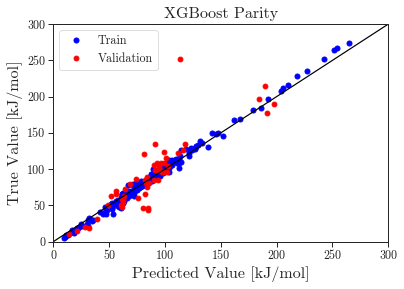

----------------------------------------------------
worst residuals: 0.8673567945079348, 0.9197154515686936, 2.9794916840624293
worst index: 16, 44, 35
1st worst barrier prediction: 44.1716746
2st worst barrier prediction: 133.974802
3st worst barrier prediction: 251.7728476
1st worst resid: -40.28424888900319
2st worst resid: 42.71603842000717
3st worst resid: 138.38201916845435
(46.444841550883424, 87.85107327093863)
----------------------------------------------------
MSE test score: 	182.784478330529
MAE test score: 	10.490764735448327
r2 score test: 		0.899125323449368
----------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [157]:
print("xgb algorithms")
reg_xgb = xgb.XGBRegressor(
    reg_alpha=0.2, colsample_bytree=0.4, eta=0.0, gamma=0.0,
    reg_lambda=0.0, learning_rate=0.01, max_depth=5, n_estimators=500,
    objective="reg:squarederror", tree_method="gpu_hist")

reg_xgb.fit(x_train, y_train)
score_single(reg_xgb, x_train, x_test, y_train, y_test, std)


extra algorithm
................................................
----------------------------------------------------
MAE test score: 	12.962851174654277
MAE train score:	3.9925500709939863
----------------------------------------------------
r2 score test: 		0.7249595810622567
r2 score train:		0.9754318122614574


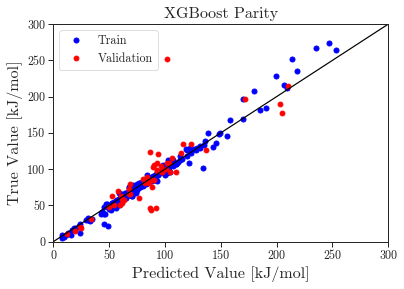

----------------------------------------------------
worst residuals: 0.9388080833935072, 0.9923729913062141, 3.2224718121777407
worst index: 16, 18, 35
1st worst barrier prediction: 44.1716746
2st worst barrier prediction: 45.8333535
3st worst barrier prediction: 251.7728476
1st worst resid: -43.60279267989999
2st worst resid: -46.09060634059333
3st worst resid: 149.66719271878333
(46.444841550883424, 87.85107327093863)
----------------------------------------------------
MSE test score: 	157.78528450261808
MAE test score: 	9.180359887572886
r2 score test: 		0.9131356279390682
----------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [158]:
print("extra algorithm")
reg_extra = ExtraTreesRegressor(min_samples_split=2,
                                min_samples_leaf=2,
                                n_estimators=1600)

reg_extra = ExtraTreesRegressor(min_samples_split=2,
                                min_samples_leaf=2,
                                n_estimators=500)
custom_scorer_extra = custom_skopt_extra_scorer
reg_extra.fit(x_train, y_train)
score_single(reg_extra, x_train, x_test, y_train, y_test, std)


random forest algorithms 
................................................
----------------------------------------------------
MAE test score: 	13.68408131319643
MAE train score:	7.166291757737561
----------------------------------------------------
r2 score test: 		0.7006973815421992
r2 score train:		0.9333093455973765


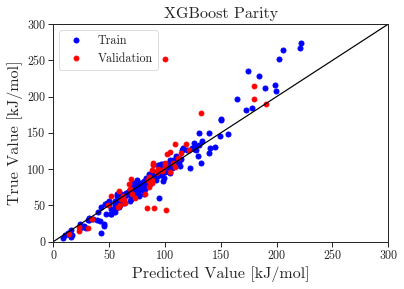

----------------------------------------------------
worst residuals: 0.9927999713161456, 1.2250454744186279, 3.263500011329395
worst index: 7, 16, 35
1st worst barrier prediction: 177.9198955
2st worst barrier prediction: 44.1716746
3st worst barrier prediction: 251.7728476
1st worst resid: 46.11043735949999
2st worst resid: -56.897042951999985
3st worst resid: 151.5727409275
(46.444841550883424, 87.85107327093863)
----------------------------------------------------
MSE test score: 	179.61309893516625
MAE test score: 	9.65525155283019
r2 score test: 		0.8942323618059571
----------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [159]:
print("random forest algorithms ")
reg_rf = RandomForestRegressor(min_samples_leaf=2, min_samples_split=2,
                               n_estimators=100, n_jobs=10)
reg_rf = RandomForestRegressor(n_jobs=10)
custom_scorer_rf = custom_skopt_rf_scorer
reg_rf.fit(x_train, y_train)
score_single(reg_rf, x_train, x_test, y_train, y_test, std)

................................................
----------------------------------------------------
MAE test score: 	13.999173426919779
MAE train score:	1.5032859532446217
----------------------------------------------------
r2 score test: 		0.7423901228639119
r2 score train:		0.9984405138077791


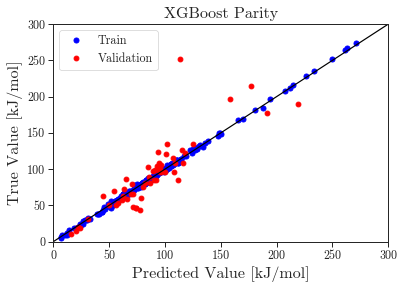

----------------------------------------------------
worst residuals: 0.8129319864538727, 0.8327976303287334, 2.974315880295035
worst index: 4, 13, 35
1st worst barrier prediction: 214.4647552
2st worst barrier prediction: 197.3163019
3st worst barrier prediction: 251.7728476
1st worst resid: 37.75649730249503
2st worst resid: 38.67915398456921
3st worst resid: 138.14162978257926
(46.444841550883424, 87.85107327093863)
----------------------------------------------------
MSE test score: 	199.60372495362157
MAE test score: 	10.742951525242722
r2 score test: 		0.8509406028691023
----------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [160]:
dict = {'learning_rate': 0.005, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 8,
        'n_estimators': 1500, 'subsample': 0.5}

dict = {'learning_rate': 0.020037429107630705, 'min_samples_split': 3, 'min_samples_leaf': 1, 
        'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.3319757440943847}
reg_grad = GradientBoostingRegressor(**dict)
reg_grad.fit(x_train, y_train)
score_single(reg_grad, x_train, x_test, y_train, y_test, std)

ada algorithm
................................................
----------------------------------------------------
MAE test score: 	19.627558676884963
MAE train score:	14.050772958935687
----------------------------------------------------
r2 score test: 		0.6314746640753002
r2 score train:		0.858775732784066


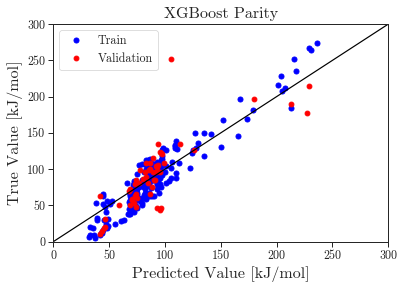

----------------------------------------------------
worst residuals: 1.0846943015559392, 1.114244121753047, 3.1448081605571074
worst index: 18, 16, 35
1st worst barrier prediction: 45.8333535
2st worst barrier prediction: 44.1716746
3st worst barrier prediction: 251.7728476
1st worst resid: -50.37845496691176
2st worst resid: -51.750891683823525
3st worst resid: 146.06011672500003
(46.444841550883424, 87.85107327093863)
----------------------------------------------------
MSE test score: 	378.55013741529723
MAE test score: 	16.055732500562687
r2 score test: 		0.7915995773381921
----------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [161]:
print("ada algorithm")
reg_ada = AdaBoostRegressor(n_estimators=1000, learning_rate=0.10)
reg_ada.fit(x_train, y_train)
score_single(reg_ada, x_train, x_test, y_train, y_test, std)

In [174]:
trial_x, trial_y = ref_df[3:7], y_scale[3:7]
print(trial_y * np.std(y) + np.mean(y) )
print(  reg_xgb.predict(trial_x) )

[108.8553304 134.7338337 251.7728476 228.4528941]
[0.53325105 0.64398295 0.54989433 2.8107326 ]


In [20]:
print(std)

# Algo option 1:
#print(reg_xgb.predict(ref_df_val)* std[0] + std[1])
# Algo option 2:
print(reg_extra.predict(ref_df_val)* std[0] + std[1])
# Algo option 3:
#print(reg_rf.predict(ref_df_val)* std[0] + std[1])

#print(reg_grad.predict(ref_df_val)* std[0] + std[1])
#print(dataset_val)

(46.444841550883424, 87.85107327093863)
[90.85700818 74.26371683 80.43639763 81.11095026 82.94394312 83.69411657
 80.72899715 83.31931778]


In [ ]:
ref_df_val

# Physical 
# extra - ce11 > ce20 
#uncorr
#extra- ce11 > ce20

80.43639763 81.11095026 82.94394312 83.69411657 80.72899715 83.31931778

#../enzy_test/exo_syn_left_+16-opt.sum
#../enzy_test/exo_syn_left_-16-opt.sum
#../enzy_test/exo_syn_right_+16-opt.sum
#../enzy_test/exo_syn_right_-16-opt.sum
#../enzy_test/exo_syn_left_nef-opt.sum
#../enzy_test/exo_syn_right_nef-opt.sum

#order: left+16, left_nef, left, left-16, right+16, right_nef, right-16
#barriers(in order): 80.44, 80.73, 81.11, 82.94, 83.32, 83.69

# Endo-Exo Prediction 

In [87]:
import argparse
import multiprocessing as mp

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, \
    GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, Matern
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge, SGDRegressor, Ridge, HuberRegressor, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import scale
from skopt.searchcv import BayesSearchCV
from skopt.space import Real, Integer

from extract_helpers_shifted import *
from feature_sel_util import *
from scoring_functions import *



x, y = extract_all()
min = np.min(y)
max = np.max(y)
std = (np.std(y), np.mean(y))
y_scale = (y - np.mean(y)) / np.std(y)

phys_post = [
    "$\mathcal{Bond}_{7}$", "$\mathcal{Bond}_{8}$", "$\mathcal{Bond}_{9}$", "$\mathcal{Bond}_{10}$",
    "$\mathcal{q}_{1}$", "$\mathcal{q}_{2}$", "$\mathcal{q}_{3}$",
    "$\mathcal{q}_{4}$", "$\mathcal{q}_{5}$", "$\mathcal{q}_{6}$",
    "$\mathcal{D2}_{sum,7}$",
    "$\mathcal{DI}_{1}$", "$\mathcal{DI}_{2}$", "$\mathcal{DI}_{3}$",
    "$\mathcal{DI}_{4}$", "$\mathcal{DI}_{5}$", "$\mathcal{DI}_{6}$",
    "$\mathcal{Ee}_{1}$", "$\mathcal{Ee}_{2}$", "$\mathcal{Ee}_{3}$", "$\mathcal{Ee}_{4}$",
    "$\mathcal{ESP}_{1}$", "$\mathcal{ESP}_{2}$", "$\mathcal{ESP}_{3}$",
    "$\mathcal{ESP}_{4}$", "$\mathcal{ESP}_{5}$", "$\mathcal{ESP}_{6}$", "$\mathcal{ESP}_{10}$"

]

phys_x_post_df = x[phys_post]
phys_post_x = scale(x[phys_post].to_numpy())
dataset = phys_post_x
ref_df = phys_x_post_df

In [154]:
from sklearn.model_selection import train_test_split

list_a = [*range(37,73)]
list_b = [*range(111,129)]
list_c = [*range(169,189)]
list_d = [*range(220,232)]
block =  [*range(129,139)]
sonnet = [*range(189,216)]
alternating = list_a + list_b + list_c + list_d

length_endo_exo = int(len(alternating)/2) + int(len(block)/2)\
+ int(len(sonnet)/2)

sonnet_ind_start = [0,1, 4,5,
                    8,9, 12,13,
                    16,17, 20,21,
                    24,25
]

ind_train, ind_test = train_test_split(range(length_endo_exo), test_size=0.2, random_state=1)
ind_transform_train = []
ind_transform_test =  []


for ind_temp in ind_train:
    if(ind_temp < 42):
        ind_transform_train.append(int(alternating[ind_temp*2]))
        ind_transform_train.append(int(alternating[2*ind_temp+1]))
        
    elif(ind_temp < 47):
        ind_transform_train.append(int(block[ind_temp-42]))
        ind_transform_train.append(int(block[ind_temp-42+int(len(block)/2)]))
    else: 
        ind_transform_train.append(int(sonnet[sonnet_ind_start[ind_temp - 47]]))
        ind_transform_train.append(int(sonnet[sonnet_ind_start[ind_temp - 47]] + 2))

for ind_temp in ind_test:
    if(ind_temp < 42):
        ind_transform_test.append(int(alternating[ind_temp*2]))
        ind_transform_test.append(int(alternating[2*ind_temp+1]))
        
    elif(ind_temp < 47):
        ind_transform_test.append(int(block[ind_temp-42]))
        ind_transform_test.append(int(block[ind_temp-42+int(len(block)/2)]))
    else: 
        ind_transform_test.append(int(sonnet[sonnet_ind_start[ind_temp - 47]]))
        ind_transform_test.append(int(sonnet[sonnet_ind_start[ind_temp - 47]] + 2))

x_train = ref_df.iloc[ind_transform_train]
x_test = ref_df.iloc[ind_transform_test]
y_train = y_scale[ind_transform_train]
y_test = y_scale[ind_transform_test]
print(len(ind_transform_test) +  len(ind_transform_train))

122


In [152]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, \
    GradientBoostingRegressor

reg = RandomForestRegressor(n_estimators=250)
dict = {'learning_rate': 0.005, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5,
        'n_estimators': 1500, 'subsample': 0.5}
reg = GradientBoostingRegressor(**dict)

reg.fit(x_train, y_train)
y_hat = reg.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print("------------------------------")
print("mae test:" + str(mae * (std[0])))
print("mse test:" + str(mse))
print("r2 test:" + str(r2))
print("------------------------------")
print(ind_transform_test)
print(ind_transform_test[0:6])
print(ind_transform_test[6:12])
print(ind_transform_test[12:18])
print(ind_transform_test[18:26])
print("\n")

print((y_hat[0:6]) * np.std(y) + np.mean(y))
print((y_hat[6:12]) * np.std(y) + np.mean(y))
print((y_hat[12:18]) * np.std(y) + np.mean(y))
print((y_hat[18:26]) * np.std(y) + np.mean(y))

------------------------------
mae test:11.941966842621431
mse test:0.10286060541520162
r2 test:0.5251393695394033
------------------------------
[226, 227, 129, 134, 41, 42, 193, 195, 197, 199, 127, 128, 183, 184, 187, 188, 228, 229, 224, 225, 123, 124, 202, 204, 133, 138]
[226, 227, 129, 134, 41, 42]
[193, 195, 197, 199, 127, 128]
[183, 184, 187, 188, 228, 229]
[224, 225, 123, 124, 202, 204, 133, 138]


[58.7643431  60.64491605 98.10813901 99.20219489 86.53675345 79.26996714]
[64.05476542 58.23125163 48.02554388 50.08040185 30.1291687  81.89063082]
[ 9.63848926 28.96127615 60.69685166 54.70411303 57.75089158 57.49985495]
[60.34543967 60.05131435 57.20226502 15.00727604 62.0861334  65.4821211
 84.85491674 79.46768957]


In [127]:
print(sorted(ind_transform_test[::2]))
#41: T
#123: T
#127: T
#129: T
#133: F
#183: T
#187: T
#193: F
#197: T
#202: F
#224: F
#226: T
#228: T
# Trial: 9/13 70%

[41, 123, 127, 129, 133, 183, 187, 193, 197, 202, 224, 226, 228]
